# Crime data anlyisis using kmeans clustering

In [1]:
# importing necessaary packages 
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
c_data = pd.read_csv("crime_data.csv")

In [3]:
c_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# reamoving catogorical column which is only a Identifier
data = c_data.iloc[:,1:5]

In [5]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [6]:
# nomralizing values
def normalized_values(i):
    X = (i-i.min())/(i.max()-i.min())
    return(X)

In [7]:
norm_df = normalized_values(data)

In [8]:
norm_df.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [9]:
norm_df = norm_df.values

In [10]:
norm_df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

##  finding optimum numbers of a clusters using elbow plot

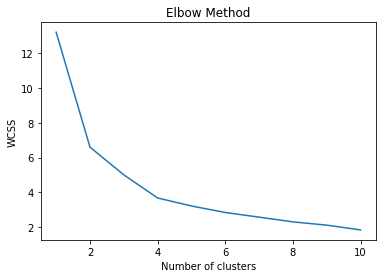

In [11]:
wcss = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters = i,random_state = 0)
    Kmeans.fit(norm_df)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Model building
cluster_new = KMeans(4,random_state = 42)
cluster_new.fit(norm_df)

KMeans(n_clusters=4, random_state=42)

In [13]:
cluster_new.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [14]:
# assigning the clustersid to dataset
c_data["cluster_id"] = cluster_new.labels_

In [15]:
c_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [16]:
# grouping data using clusterid
c_data.groupby("cluster_id").agg(["mean"])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster_id,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.966667,264.000000,76.500000,33.608333
2,13.937500,243.625000,53.750000,21.412500
3,5.852941,141.176471,73.647059,19.335294


In [17]:
c_data[c_data.cluster_id == 3].reset_index()

,index,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id
0,6,Connecticut,3.3,110,77,11.1,3
1,7,Delaware,5.9,238,72,15.8,3
2,10,Hawaii,5.3,46,83,20.2,3
3,13,Indiana,7.2,113,65,21.0,3
4,15,Kansas,6.0,115,66,18.0,3
5,20,Massachusetts,4.4,149,85,16.3,3
6,24,Missouri,9.0,178,70,28.2,3
7,29,New Jersey,7.4,159,89,18.8,3
8,34,Ohio,7.3,120,75,21.4,3
9,35,Oklahoma,6.6,151,68,20.0,3


In [18]:
c_data['cluster_id'].value_counts()

3    17
0    13
1    12
2     8
Name: cluster_id, dtype: int64

# AIrlines 

In [26]:
# will use standardScaler for standardizing the values
from sklearn.preprocessing import StandardScaler

In [23]:
# importing the dataset 
airlines = pd.read_csv("EastWestAirlines.csv")

In [21]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
# removing the first column which is only a identifier
airlines2 = airlines.iloc[:,1:]
airlines2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [25]:
# cheking for nul-VALUES AND column types
airlines2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [28]:
# standardizing the data 
airlines_norm = StandardScaler().fit_transform(airlines2)
airlines_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

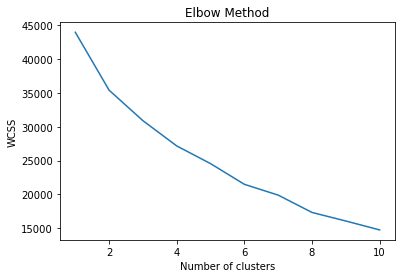

In [32]:
# finding optimum no of clusters using elbow plot
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airlines_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## build clusters algorithm using k=5

In [36]:
clusters_5 = KMeans(n_clusters=5,random_state=29).fit(airlines_norm)
clusters_5.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [40]:
#creating a copy of a data  and assigning a custers to dataset as a column clusters_5id
airlines3=airlines2.copy()
airlines3['clusters_5id']=clusters_5.labels_
airlines3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_5id
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [41]:
# grouping data using clusters_5id where k=5
airlines3.groupby('clusters_5id').agg(['mean']).reset_index()

,clusters_5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,57335.061298,181.716346,1.673077,1.045673,1.000000,10664.475962,10.653846,400.550481,1.207933,4223.920673,0.985577
1,1,43434.855641,85.247610,1.305927,1.006214,1.000478,4780.064532,7.181166,152.658700,0.459847,3619.831262,0.000000
2,2,195078.309677,799.077419,2.219355,1.038710,1.000000,32714.019355,27.948387,5529.587097,16.283871,4691.432258,0.800000
3,3,136414.542541,134.529282,4.106077,1.001105,1.002210,47745.756906,19.619890,356.306077,1.080663,5068.232044,0.584530
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
